In [1]:
import networkx as nx

from fair_cc_functions import *
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats_complete(unfair_graph):
    stats = []
    nodes = len(unfair_graph.nodes)
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    fair_cluster = cc_pivot(fair_graph)
    costs = cost(fair_cluster, unfair_graph)
    stats.append(costs)
    return stats

def stats_incomplete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    for j in range(iteration):
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

# random vs. random plot
plt.rc('font', size=11)
def draw_boxplot(to_plot,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):

    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/j for i,j in zip(to_plot, np.min(to_plot, axis=1))], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    #plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

In [3]:
# stats for scenario 1
# always same costs as already optimal
res0 = []
for i in range(10, 61, 2):
    unfair_graph = generate_complete_graph(i)
    res0.append(stats_complete(unfair_graph))
nodes = [i for i in range(10, 61, 2)]
max_calc_cost = [i*i/4 for i in nodes]

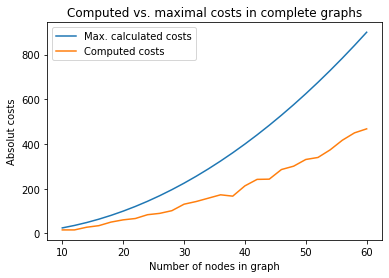

In [4]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res0, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphsPlots/comp_vs_calc_cost_complete_graph.png')
plt.show()

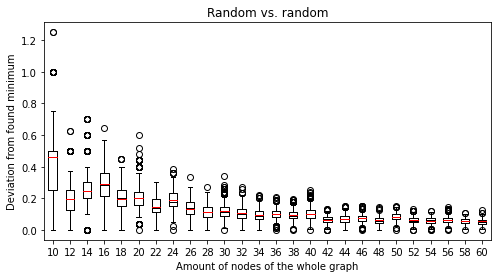

In [6]:
# similar density of incomplete graphs
# probability for (+), resp. (-), is 0.5 in red and blue subgraphs => expected same density
iters = 1000
rnd_rnd = []
for i in range(10, 61, 2):
    unfair_graph = generate_incomplete_graph(i)
    stat = stats_incomplete(unfair_graph, iteration=iters)
    rnd_rnd.append(stat)

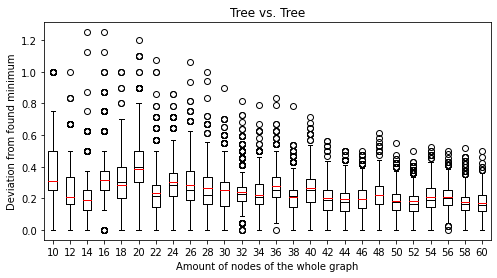

In [7]:
# red/blue subgraphs are both sparse (regarding (+) relations)
tree_tree, tree_star, star_star, cyc_cyc = [], [], [], []
cyc_star, cyc_tree = [],[]
for i in range(10, 61, 2):
    tree_tree_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'bal_bin_tree')
    tree_tree.append(stats_incomplete(tree_tree_graph, iteration=iters))


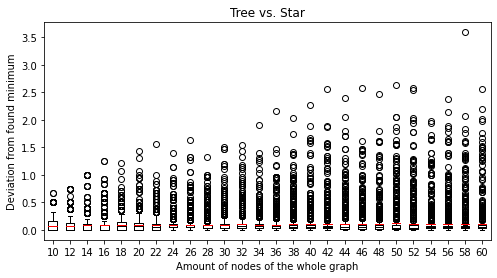

In [8]:
for i in range(10, 61,2):
    tree_star_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'star')
    tree_star.append(stats_incomplete(tree_star_graph, iteration=iters))


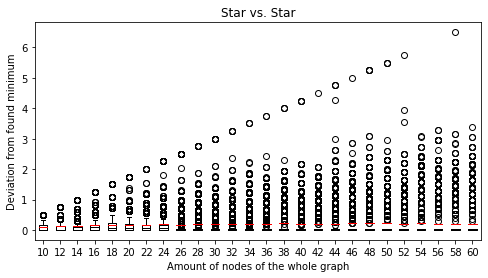

In [9]:
for i in range(10, 61, 2):
    star_star_graph, b,r = generate_red_blue_graph(i, 'star', 'star')
    star_star.append(stats_incomplete(star_star_graph, iteration=iters))


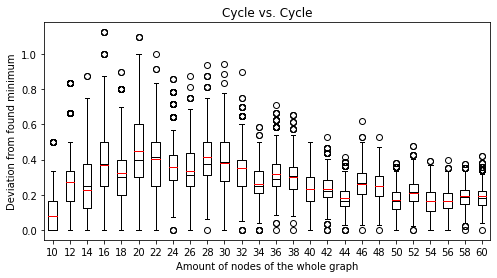

In [10]:
for i in range(10, 61, 2):
    cyc_cyc_graph, b, r = generate_red_blue_graph(i, 'circle', 'circle')
    cyc_cyc.append(stats_incomplete(cyc_cyc_graph, iteration=iters))


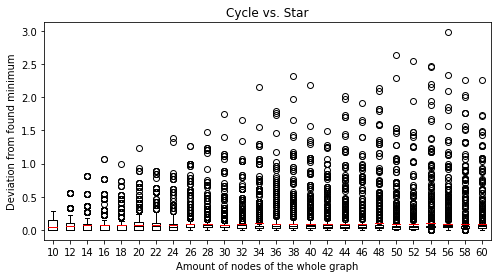

In [11]:
for i in range(10, 61, 2):
    cyc_star_graph, b, r = generate_red_blue_graph(i, 'circle', 'star')
    cyc_star.append(stats_incomplete(cyc_star_graph, iteration=iters))


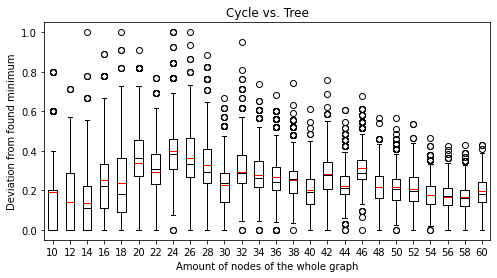

In [12]:
for i in range(10, 61, 2):
    cyc_tree_graph, b, r = generate_red_blue_graph(i, 'circle', 'bal_bin_tree')
    cyc_tree.append(stats_incomplete(cyc_tree_graph, iteration=iters))


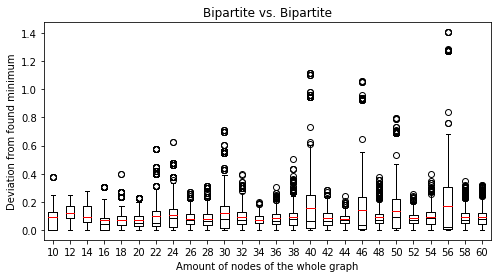

In [13]:
# red/blue subgraphs are both dense (regarding (+) relations)
bipar_bipar =[]
bipar_3par = []
threepar_3par = []
for i in range(10, 61, 2):
    bipar_bipar_grap, b, r  = generate_red_blue_graph(i, 'bipartite', 'bipartite')
    bipar_bipar.append(stats_incomplete(bipar_bipar_grap, iteration=iters))


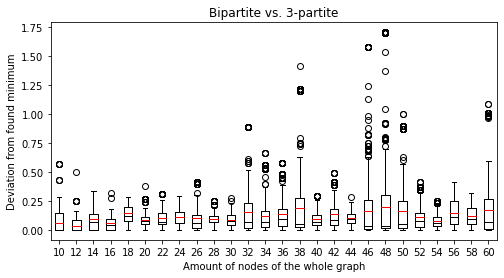

In [14]:
for i in range(10, 61, 2):
    bipar_3par_graph, b, r = generate_red_blue_graph(i, 'bipartite', '3partite')
    bipar_3par.append(stats_incomplete(bipar_3par_graph, iteration=iters))


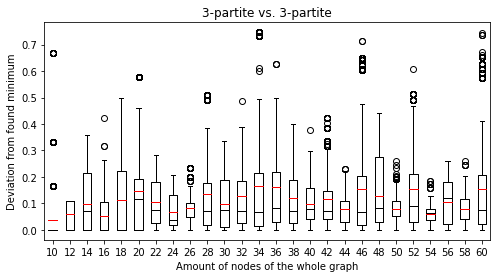

In [15]:
for i in range(10, 61, 2):
    threepar_3par_graph, b, r = generate_red_blue_graph(i, '3partite', '3partite')
    threepar_3par.append(stats_incomplete(threepar_3par_graph, iteration=iters))
    # clique_clique_graph = generate_red_blue_graph(i, 'clique', 'clique')
    # clique_clique.append(stats_incomplete(clique_clique_graph, iteration=50))
    # bipar_clique_graph = generate_red_blue_graph(i, 'clique', 'bipartite')
    # bipar_clique.append(stats_incomplete(bipar_clique_graph, iteration=50))


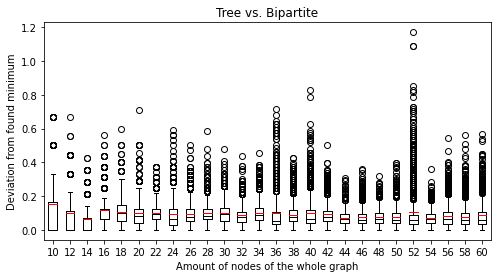

In [16]:
# red/blue subgraph are dense/sparse (regarding + relations)
tree_bipar, star_bipar, cyc_bipar = [], [], []
tree_3par, star_3par, cyc_3par = [],[],[]
for i in range(10, 61, 2):
    tree_bipar_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'bipartite')
    tree_bipar.append(stats_incomplete(tree_bipar_graph, iteration=iters))


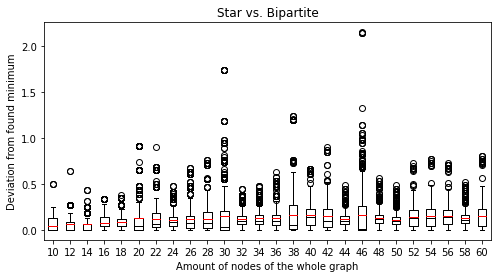

In [17]:
for i in range(10, 61, 2):
    star_bipar_graph, b, r = generate_red_blue_graph(i, 'star', 'bipartite')
    star_bipar.append(stats_incomplete(star_bipar_graph, iteration=iters))


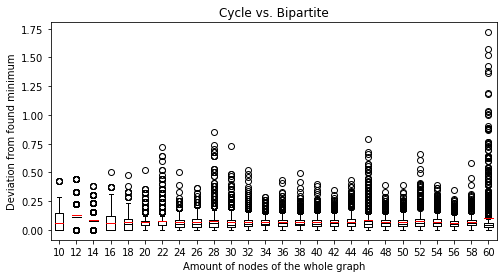

In [18]:
for i in range(10, 61, 2):
    cyc_bipar_graph, b, r = generate_red_blue_graph(i, 'circle', 'bipartite')
    cyc_bipar.append(stats_incomplete(cyc_bipar_graph, iteration=iters))


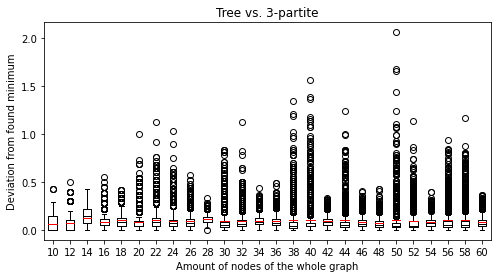

In [19]:
for i in range(10, 61, 2):
    tree_3par_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', '3partite')
    tree_3par.append(stats_incomplete(tree_3par_graph, iteration=iters))


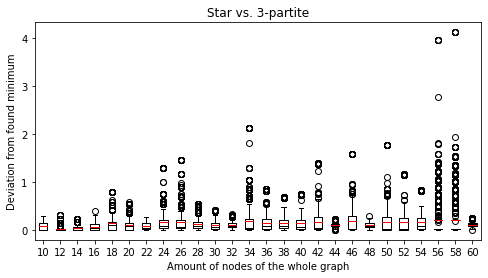

In [20]:
for i in range(10, 61, 2):
    star_3par_graph , b, r= generate_red_blue_graph(i, 'star', '3partite')
    star_3par.append(stats_incomplete(star_3par_graph, iteration=iters))


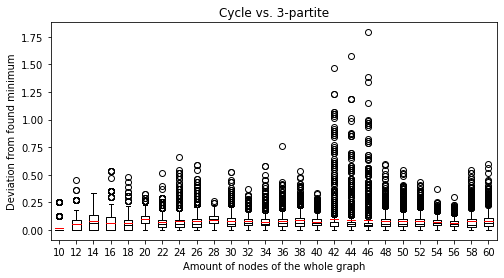

In [21]:
for i in range(10, 61, 2):
    cyc_3par_graph, b, r = generate_red_blue_graph(i, 'circle', '3partite')
    cyc_3par.append(stats_incomplete(cyc_3par_graph, iteration=iters))


In [31]:
def draw_multi_boxplot(to_plot,
                       title='Title',
                       ylabel ='Deviation from found minimum',
                       xlabel='Amount of nodes of the whole graph',
                       name='boxplot'
                        ):
    plt.rc('font', size=18)
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    n_plots = len(to_plot)
    positions = [-0.3, 0, 0.3]
    colors=['black', 'blue', 'green']
    for i in range(n_plots):
        draw_plot(to_plot[i], ax, positions[i], colors[i], 'white', title, ylabel, xlabel)
    plt.xticks([i for i in range(len(nodes))], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()


# function to get multiple boxplots as one figure
def draw_plot(data, ax, offset, edge_color, fill_color, title, ylabel, xlabel):
    pos = np.arange(len(data))+offset
    bp = ax.boxplot([(i-j)/(k-j) for i,j,k in zip(data, np.min(data, axis=1), 3*np.min(data, axis=1))], positions= pos, widths=0.2, patch_artist=True,
                    showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'}, flierprops={'markeredgecolor':edge_color})
    for element in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

data = [cyc_cyc, star_star, tree_star, cyc_star, tree_tree, cyc_tree, bipar_bipar, bipar_3par, threepar_3par, cyc_bipar, cyc_3par, tree_bipar, tree_3par, star_bipar, star_3par]
names = ['cyc_cyc', 'star_star', 'tree_star', 'cyc_star', 'tree_tree', 'cyc_tree', 'bipar_bipar', 'bipar_3par', 'threepar_3par', 'cyc_bipar', 'cyc_3par', 'tree_bipar', 'tree_3par', 'star_bipar', 'star_3par']
max=0
max_mean = 0
max_amt = 0
for i in range(len(data)):
    scaled = [i/j for i,j,k in zip(data[i], np.min(data[i], axis=1), 3*np.min(data[i], axis=1))]
    if np.max(scaled) > max: max = np.max(scaled)
    if np.max(np.mean(scaled, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled, axis=1))
    if np.sum(np.max(scaled, axis=1)>1) > max_amt: max_amt = np.sum(np.max(scaled, axis=1)>3)
    print(names[i]+'(max/mean/amt > 1):' + str(np.max(scaled)) + '/'+str(np.max(np.mean(scaled, axis=1)))+'/'+str(np.sum(np.max(scaled, axis = 1)>3)))
print(max)
print(max_mean)
print(max_amt)

cyc_cyc(max/mean/amt > 1):3.25/1.8996000000000002/2
star_star(max/mean/amt > 1):14.0/1.4699565217391304/23
tree_star(max/mean/amt > 1):8.185185185185185/1.246/23
cyc_star(max/mean/amt > 1):6.962264150943396/1.1987096774193546/21
tree_tree(max/mean/amt > 1):3.5/1.7652000000000003/5
cyc_tree(max/mean/amt > 1):3.0/1.801076923076923/0
bipar_bipar(max/mean/amt > 1):3.812121212121212/1.3346181818181817/3
bipar_3par(max/mean/amt > 1):4.405940594059406/1.3884158415841585/4
threepar_3par(max/mean/amt > 1):2.493333333333333/1.3296533333333334/0
cyc_bipar(max/mean/amt > 1):4.439024390243903/1.265333333333333/1
cyc_3par(max/mean/amt > 1):4.580645161290323/1.1979354838709677/3
tree_bipar(max/mean/amt > 1):3.340909090909091/1.3096666666666665/1
tree_3par(max/mean/amt > 1):5.119402985074627/1.2578571428571428/9
star_bipar(max/mean/amt > 1):5.3/1.332157894736842/3
star_3par(max/mean/amt > 1):9.227848101265822/1.4330126582278482/9
14.0
1.8996000000000002
9


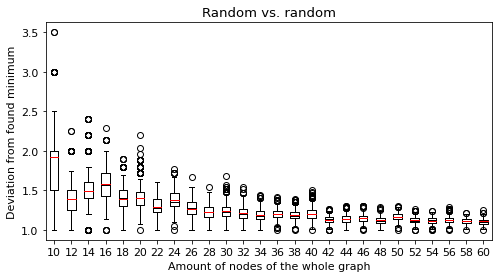

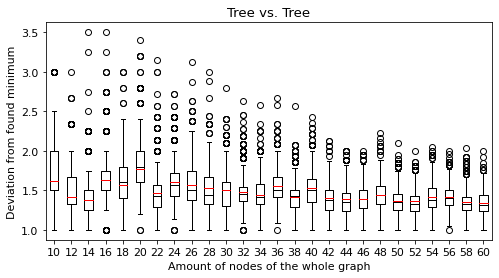

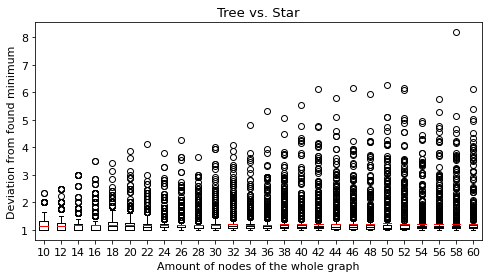

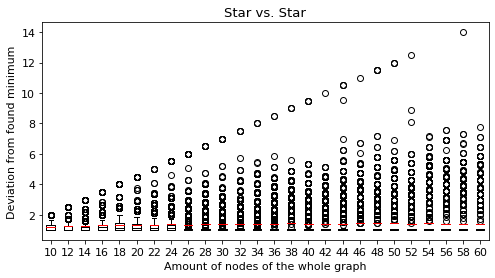

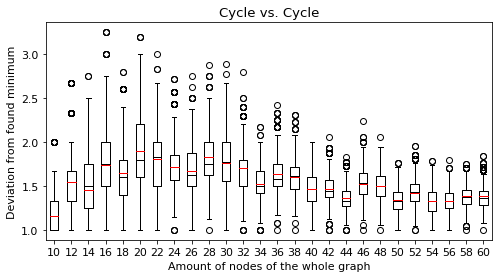

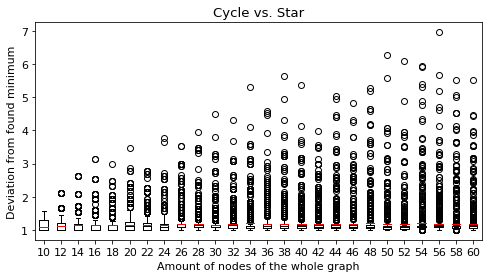

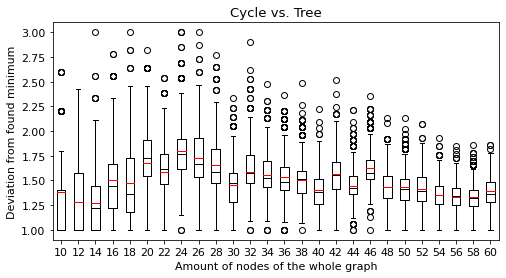

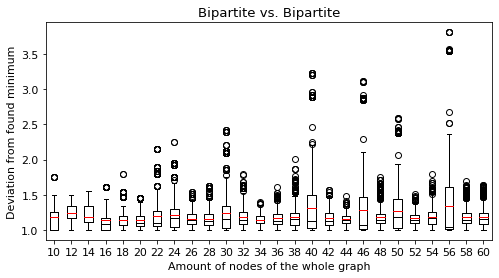

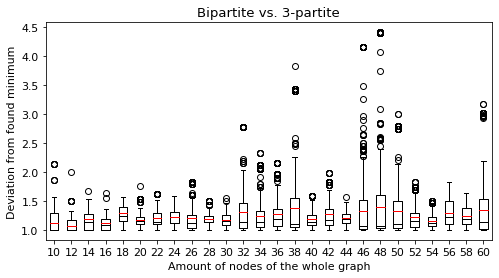

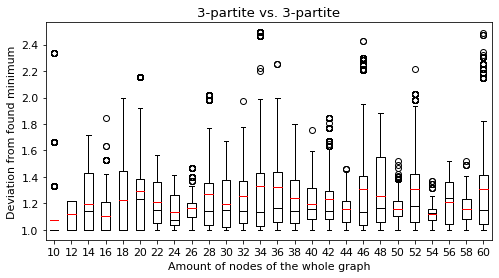

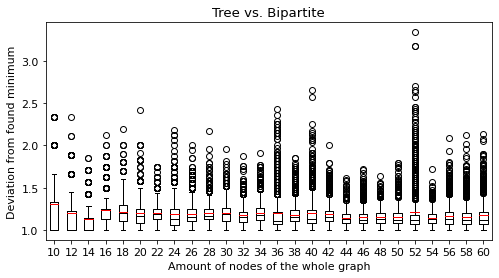

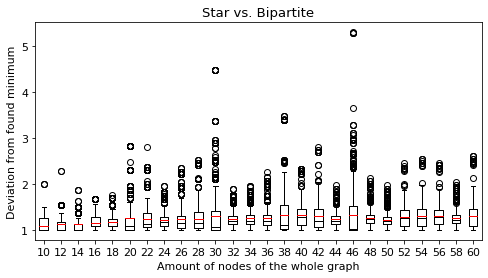

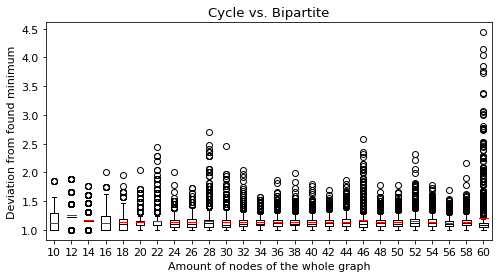

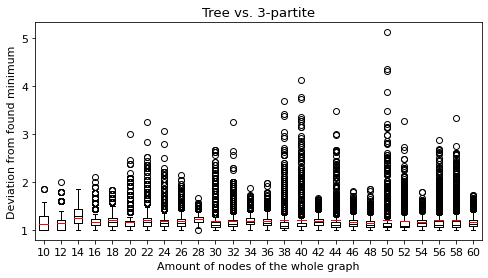

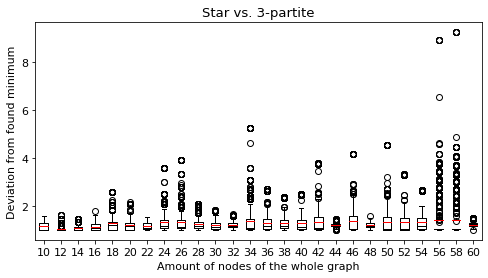

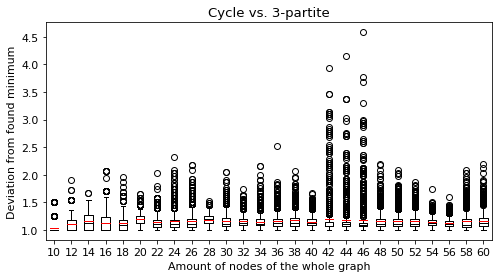

In [25]:
draw_boxplot(rnd_rnd, 'Random vs. random', name='random_random.png')
draw_boxplot(tree_tree, "Tree vs. Tree", name='tree_tree_1000')
draw_boxplot(tree_star, 'Tree vs. Star', name='tree_star_1000')
draw_boxplot(star_star, 'Star vs. Star', name='star_star_1000')
draw_boxplot(cyc_cyc, 'Cycle vs. Cycle', name='cyc_cyc_1000')
draw_boxplot(cyc_star, 'Cycle vs. Star', name='cyc_star_1000')
draw_boxplot(cyc_tree, "Cycle vs. Tree", name='cyc_tree_1000')
draw_boxplot(bipar_bipar, 'Bipartite vs. Bipartite', name='bipar_bipar_1000')
draw_boxplot(bipar_3par, 'Bipartite vs. 3-partite', name='bipar_3par_1000')
draw_boxplot(threepar_3par, '3-partite vs. 3-partite', name='threepar_threepar_1000')
draw_boxplot(tree_bipar, "Tree vs. Bipartite", name ='tree_bipar_1000')
draw_boxplot(star_bipar, 'Star vs. Bipartite', name='star_bipar_1000')
draw_boxplot(cyc_bipar, "Cycle vs. Bipartite", name='cyc_bipar_1000')
draw_boxplot(tree_3par, 'Tree vs. 3-partite', name='tree_3par_1000')
draw_boxplot(star_3par, 'Star vs. 3-partite', name='star_3par_1000')
draw_boxplot(cyc_3par, "Cycle vs. 3-partite", name='cyc_3par_1000')

In [38]:

# draw_boxplot(rnd_rnd, 'Random vs. random', name='random_random.png')
# draw_boxplot(tree_tree, 'Tree vs. tree', name='tree_tree.png')
# draw_boxplot(star_star, 'Star vs. star', name='star_star.png')
# draw_boxplot(tree_star, 'Tree vs. star', name='tree_star.png')
# draw_boxplot(cyc_cyc, 'Cycle vs. cycle', name='cyc_cyc.png')
# draw_boxplot(bipar_bipar, 'Bipartite vs. bipartite', name='bipar_bipar.png')
# # draw_boxplot(clique_clique, 'Clique vs. clique', name='clique_clique.png')
# # draw_boxplot(bipar_clique, 'Bipartite vs. clique', name='bipar_clique.png')
# draw_boxplot(tree_bipar, 'Tree vs. bipartite', name='tree_bipar.png')
# draw_boxplot(star_bipar, 'Star vs. bipartite', name='star_bipar.png')
# draw_boxplot(cyc_bipar, 'Cycle vs. bipartite', name='cyc_bipar.png')

# unfair_g, red_g, blue_g = generate_red_blue_graph(12, 'circle', 'circle')
# fairlets = [(0,6), (1,7), (2,8), (3,9), (4,10), (5,11)]#create_fairlets(unfair_g)
# fair_g = nx.Graph()
# fair_g.add_nodes_from(fairlets)
# fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_g)
# fair_g.add_weighted_edges_from(fair_p)
# fair_g.add_weighted_edges_from(fair_m)
#
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# draw_graph(fair_g, ax1)
# nx.draw(red_g, ax=ax2, with_labels=True)
# nx.draw(blue_g, ax=ax3, with_labels=True)
# min, max = np.inf, 0
# for i in range(1000):
#     cluster = cc_pivot(fair_g)
#     c = cost(cluster, unfair_g)
#     if c > max:
#         max = c
#         print(cluster)
#         print('new Max:', max)
#     if c < min:
#         min = c
#         print(cluster)
#         print('new min:', min)
#
# #print(cluster)
# print(min)
# print(max)
file = open('res.txt', 'w')
file.write(str(names)+'\n'+str(data))
file.close()